# Notebook to test-run Cicero on TDR118 dataset (pilot)

- Here, we will just grab the TDR118 pilot data object (whose peak profiles might not be the most comprehensive one), and see if we can follow the Cicero workflow.
- The end goal is to generate a csv file from Cicero (CCANs) that can be fed into CellOracle workflow.
- Original sources: 
    - CellOracle paper (Kamimoto,...,Morris et al., Nature, 2023)
    - Signac/Cicero vignette (https://stuartlab.org/signac/articles/cicero.html)
    
- input: h5Seurat file (preprocessed using Signac/Seurat)
- output: csv file


# Overview 
This notebook is an example R script on how to prepare the input data prior to building a base GRN.
Here, we use Cicero to extract the cis-regulatory connections between scATAC-seq peaks.

 - `Cicero` documentation: https://cole-trapnell-lab.github.io/cicero-release/docs_m3/ 
 
 **NOTE** 
 Here, we installed Cicero's monocle3-compatible branch using local directory. Usually, it's better to do global installation of packages.


In [2]:
library(remotes)
library(devtools)
withr::with_libpaths(new="/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib", 
                     install_github("cole-trapnell-lab/cicero-release", ref = "monocle3", force = TRUE))

monocle3 (b2e9b6b19... -> 72cfa1daf...) [GitHub]


leidenbase (0.1.18 -> 0.1.25) [CRAN]


Installing 1 packages: leidenbase

Installing package into ‘/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘leidenbase’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpU8MutC/remotes22e7df1d77011f/cole-trapnell-lab-monocle3-72cfa1d/DESCRIPTION’ ... OK
* preparing ‘monocle3’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘monocle3_1.3.3.tar.gz’



Installing package into ‘/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpU8MutC/remotes22e7df24569eb1/cole-trapnell-lab-cicero-release-2b0ee07/DESCRIPTION’ ... OK
* preparing ‘cicero’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘cicero_1.3.9.tar.gz’



Installing package into ‘/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib’
(as ‘lib’ is unspecified)



In [8]:
# withr::with_libpaths(new="/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/archive/.local/R_lib", 
#                      install_github("cole-trapnell-lab/cicero-release", ref = "monocle3", force = TRUE))

monocle3     (b54546096... -> 72cfa1daf...) [GitHub]
DelayedArray (0.26.6       -> 0.26.7      ) [CRAN]
S4Arrays     (1.0.4        -> 1.0.5       ) [CRAN]
MatrixGen... (1.12.2       -> 1.12.3      ) [CRAN]
viridis      (0.6.3        -> 0.6.4       ) [CRAN]


Installing 4 packages: DelayedArray, S4Arrays, MatrixGenerics, viridis

Installing packages into '/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/archive/.local/R_lib'
(as 'lib' is unspecified)




scuttle    (1.10.1 -> 1.10.2) [CRAN]
leidenbase (0.1.18 -> 0.1.25) [CRAN]


Installing 2 packages: scuttle, leidenbase

Installing packages into '/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/archive/.local/R_lib'
(as 'lib' is unspecified)

Warning message in i.p(...):
"installation of package 'leidenbase' had non-zero exit status"


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAPBp02/remotes224cc76b172ff7/cole-trapnell-lab-monocle3-72cfa1d/DESCRIPTION’ ... OK
* preparing ‘monocle3’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘monocle3_1.3.3.tar.gz’



Installing package into '/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/archive/.local/R_lib'
(as 'lib' is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAPBp02/remotes224cc75e8f1c12/cole-trapnell-lab-cicero-release-2b0ee07/DESCRIPTION’ ... OK
* preparing ‘cicero’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘cicero_1.3.9.tar.gz’



Installing package into '/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/archive/.local/R_lib'
(as 'lib' is unspecified)



In [9]:
# withr::with_libpaths(new="/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib", 
#                       install_github("cole-trapnell-lab/monocle3", ref = "develop"))

leidenbase (0.1.18 -> 0.1.25) [CRAN]


Installing 1 packages: leidenbase

Installing package into '/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib'
(as 'lib' is unspecified)

Warning message in i.p(...):
"installation of package 'leidenbase' had non-zero exit status"


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAPBp02/remotes224cc74b4cd1be/cole-trapnell-lab-monocle3-b2e9b6b/DESCRIPTION’ ... OK
* preparing ‘monocle3’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘monocle3_1.3.1.tar.gz’



Installing package into '/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib'
(as 'lib' is unspecified)



In [ ]:
# .libPaths("/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib")

In [2]:
# Load the Cicero library from the local installation (trapnell lab branch for Signac implementation)
withr::with_libpaths(new = "/hpc/scratch/group.data.science/yangjoon.kim/.local/R_lib", 
                     library(cicero))

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

In [12]:
# library(cicero)
# library(monocle3)

# 0. Import library

In [3]:
# library(cicero)
#library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)

# 1. Load the dataset
- We will use the TDR118 (single-cell Multiome dataset from zebrafish embryos, 15-somite stage).


In [5]:
# # You can substitute the data path below to your scATAC-seq data.
# data_folder <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/annotated_data/TDR118_processed.h5Seurat"

# # Create a folder to save results
# output_folder <- "cicero_output"
# dir.create(output_folder)

# 2. Load data and make Cell Data Set (CDS) object 
## Option 1. Process data to make CDS object - from 10xCellranger-arc output files

In [5]:
proc_data_folder <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119/outs/filtered_feature_bc_matrix"
peaks_data_folder <- "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119/outs"

In [6]:
# # Read in matrix data using the Matrix package
# indata <- Matrix::readMM(paste0(proc_data_folder, "/matrix.mtx.gz")) 
# # Binarize the matrix
# indata@x[indata@x > 0] <- 1

# # Format cell info
# cellinfo <- read.table(paste0(proc_data_folder, "/barcodes.tsv.gz"))
# row.names(cellinfo) <- cellinfo$V1
# names(cellinfo) <- "cells"

# # Format peak info
# peakinfo <- read.table(paste0(peaks_data_folder, "/atac_peaks.bed"))
# names(peakinfo) <- c("chr", "bp1", "bp2")
# peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="_")
# row.names(peakinfo) <- peakinfo$site_name

# row.names(indata) <- row.names(peakinfo)
# colnames(indata) <- row.names(cellinfo)

# # Make CDS
# input_cds <-  suppressWarnings(new_cell_data_set(indata,
# cell_metadata = cellinfo,
# gene_metadata = peakinfo))

# input_cds <- monocle3::detect_genes(input_cds)

# #Ensure there are no peaks included with zero reads
# input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

## Option 2. Process data to make CDS object - from h5Seurat object

In [7]:
# import Seurat object
object <- readRDS("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119_cicero_output/TDR119_processed.RDS")
object

An object of class Seurat 
1055655 features across 13022 samples within 5 assays 
Active assay: peaks_celltype (316881 features, 316880 variable features)
 4 other assays present: RNA, ATAC, SCT, peaks_bulk
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.joint

In [8]:
# We will use the peak profiles from MACS2-bulk (all cells)
DefaultAssay(object) <- "ATAC"

In [9]:
# convert to CellDataSet format
object.cds <- as.cell_data_set(x = object)


In [10]:
# Check the object.cds - NOTE that the dim.red fields are all capitalized
object.cds

class: cell_data_set 
dim: 248320 13022 
metadata(0):
assays(2): counts logcounts
rownames(248320): 1-2372-3057 1-6507-7253 ... 9-56452315-56452858
  9-56459068-56459827
rowData names(0):
colnames(13022): AAACAGCCACCTAAGC-1 AAACAGCCAGGGAGGA-1 ...
  TTTGTTGGTTCGGGAT-1 TTTGTTGGTTTGTGGA-1
colData names(35): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(3): UMAP.RNA UMAP.ATAC UMAP.JOINT
mainExpName: ATAC
altExpNames(0):

In [ ]:
# make the cicero object
# we will use the ATAC.UMAP here for the sampling of the neighborhoods - as we'll treat this dataset as if we only had scATAC-seq.
# This is something we can ask Kenji Kamimoto/Samantha Morris later for their advice. (or compare the built GRNs from joint.UMAP vs ATAC.UMAP)
object.cicero <- make_cicero_cds(object.cds, reduced_coordinates = reducedDims(object.cds)$UMAP.ATAC)

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.211055758836731
Median shared cells bin-bin: 0



In [14]:
object.cicero

class: cell_data_set 
dim: 248320 2517 
metadata(1): cds_version
assays(1): counts
rownames(248320): 1-2372-3057 1-6507-7253 ... 9-56452315-56452858
  9-56459068-56459827
rowData names(5): num_cells_expressed chr bp1 bp2 Peak
colnames(2517): agg_9954 agg_9661 ... agg_2830 agg_5140
colData names(3): agg_cell Size_Factor num_genes_expressed
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

# 3. Find Cicero connections

We’ll demonstrate running Cicero here using just one chromosome to save some time, but the same workflow can be applied to find CCANs for the whole genome.

Here we demonstrate the most basic workflow for running Cicero. This workflow can be broken down into several steps, each with parameters that can be changed from their defaults to fine-tune the Cicero algorithm depending on your data. We highly recommend that you explore the Cicero website, paper, and documentation for more information.


In [15]:
object@assays$ATAC@seqinfo

Seqinfo object with 1923 sequences (1 circular) from GRCz11 genome:
  seqnames seqlengths isCircular genome
  1          59578282      FALSE GRCz11
  2          59640629      FALSE GRCz11
  3          62628489      FALSE GRCz11
  4          78093715      FALSE GRCz11
  5          72500376      FALSE GRCz11
  ...             ...        ...    ...
  NA758          2601      FALSE GRCz11
  CTG8005      153879      FALSE GRCz11
  CTG20005      37354      FALSE GRCz11
  CTG20006     161442      FALSE GRCz11
  CTG20007     159186      FALSE GRCz11

### NOTE
- TDR118 seurat object has different seqinfo objects per slot. So, we have to define the major seqinfo object that we will use. i.e. "TDR118@assays$ATAC@annotation" or  "TDR118@assays$ATAC"
- TDR118 didn't have the sequence length information for the chromosomes, so we will add it manually.
- Note that there are 25 chromosomes in zebrafish and also 1 MT chromosome (total of 26)

In [17]:
# TDR118 didn't have sequence length information for the chromosomes, so we will add it manually.
# Note that there are 25 chromosomes in zebrafish and also 1 MT chromosome (total of 26)
df_seqinfo <- as.data.frame(object@assays$ATAC@seqinfo)

object@assays$ATAC@annotation@seqinfo@seqlengths <- df_seqinfo$seqlengths[1:26]
object@assays$ATAC@annotation@seqinfo

Seqinfo object with 26 sequences from GRCz11 genome:
  seqnames seqlengths isCircular genome
  1          59578282       <NA> GRCz11
  2          59640629       <NA> GRCz11
  3          62628489       <NA> GRCz11
  4          78093715       <NA> GRCz11
  5          72500376       <NA> GRCz11
  ...             ...        ...    ...
  22         39133080       <NA> GRCz11
  23         46223584       <NA> GRCz11
  24         42172926       <NA> GRCz11
  25         37502051       <NA> GRCz11
  MT            16596       <NA> GRCz11

In [18]:
genome <- seqlengths(object@assays$ATAC@annotation)
genome

1        2        3        4        5        6        7        8 
59578282 59640629 62628489 78093715 72500376 60270059 74282399 54304671 
       9       10       11       12       13       14       15       16 
56459846 45420867 45484837 49182954 52186027 52660232 48040578 55266484 
      17       18       19       20       21       22       23       24 
53461100 51023478 48449771 55201332 45934066 39133080 46223584 42172926 
      25       MT 
37502051    16596

In [23]:
write.csv(as.data.frame(genome), file = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/chromosome_lengths.csv", row.names = FALSE)

In [25]:
genome <- seqlengths(object@assays$ATAC@annotation)
genome

1        2        3        4        5        6        7        8 
59578282 59640629 62628489 78093715 72500376 60270059 74282399 54304671 
       9       10       11       12       13       14       15       16 
56459846 45420867 45484837 49182954 52186027 52660232 48040578 55266484 
      17       18       19       20       21       22       23       24 
53461100 51023478 48449771 55201332 45934066 39133080 46223584 42172926 
      25       MT 
37502051    16596

In [26]:
# get the chromosome sizes from the Seurat object
genome <- seqlengths(object@assays$ATAC@annotation)

# use chromosome 1 to save some time
# omit this step to run on the whole genome
# genome <- genome[1]

# convert chromosome sizes to a dataframe
genome.df <- data.frame("chr" = names(genome), "length" = genome)

# run cicero
conns <- run_cicero(object.cicero, genomic_coords = genome.df, sample_num = 100)

In [62]:
# run cicero
conns <- run_cicero(TDR118.cicero, genomic_coords = genome.df, sample_num = 100)

In [65]:
head(conns)

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,1-10001211-10001420,1-9751998-9752267,0.0000000000
2,1-10001211-10001420,1-9752880-9753667,-0.0041574440
3,1-10001211-10001420,1-9759490-9760010,0.0003054875
4,1-10001211-10001420,1-9764232-9764701,-0.0035175474
5,1-10001211-10001420,1-9768456-9768674,-0.0028105534
6,1-10001211-10001420,1-9770147-9770354,-0.0014962415


In [74]:
dim(conns)

[1] 4413480       3

In [71]:
sqrt(4413480)

[1] 2100.828

In [76]:
TDR118@assays$peaks_bulk

ChromatinAssay data with 435704 features for 13022 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [72]:
# get the chromosome sizes from the Seurat object
genome <- seqlengths(TDR118@assays$ATAC@annotation)

# convert chromosome sizes to a dataframe (chr: chromosome name, and length: lenght of that chromosome, total of 26 entries)
genome.df <- data.frame("chr" = names(genome), "length" = genome)

# run cicero
conns_total <- run_cicero(TDR118.cicero, genomic_coords = genome.df, sample_num = 100, silent = FALSE)

In [73]:
head(conns)

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,1-10001211-10001420,1-9751998-9752267,0.0000000000
2,1-10001211-10001420,1-9752880-9753667,-0.0041574440
3,1-10001211-10001420,1-9759490-9760010,0.0003054875
4,1-10001211-10001420,1-9764232-9764701,-0.0035175474
5,1-10001211-10001420,1-9768456-9768674,-0.0028105534
6,1-10001211-10001420,1-9770147-9770354,-0.0014962415


# 4. Save results for the next step

In [31]:
TDR118.cds

class: cell_data_set 
dim: 248320 13022 
metadata(0):
assays(2): counts logcounts
rownames(248320): 1-2372-3057 1-6507-7253 ... 9-56452315-56452858
  9-56459068-56459827
rowData names(0):
colnames(13022): AAACAGCCACCTAAGC-1 AAACAGCCAGGGAGGA-1 ...
  TTTGTTGGTTCGGGAT-1 TTTGTTGGTTTGTGGA-1
colData names(62): orig.ident nCount_RNA ... ident Size_Factor
reducedDimNames(6): UMAP ATAC.UMAP ... LSI.CELLRANGER
  ATAC.UMAP.CELLRANGER
mainExpName: ATAC
altExpNames(0):

In [38]:
all_peaks <- row.names(TDR118@assays$ATAC@data)
head(all_peaks)

[1] "1-2372-3057"   "1-6507-7253"   "1-11485-12198" "1-14475-15248"
[5] "1-16516-17393" "1-17575-18198"

In [28]:
dim(all_peaks)

NULL

In [22]:
all_peaks <- row.names(exprs(TDR118.cds))
all_peaks

ERROR: Error in exprs(TDR118.cds): could not find function "exprs"


In [26]:
# all_peaks <- row.names(exprs(TDR118.cds))
# write.csv(x = all_peaks, file = paste0(output_folder, "/TDR118_macs2_bulk_peaks.csv"))
# write.csv(x = conns_total, file = paste0(output_folder, "/TDR118_cicero_connections_macs2_bulk_peaks.csv"))


In [ ]:
# save the TDR118 object again

# save as RDS
saveRDS(object = TDR118, "/data/yangjoon.kim/bruno/projects/data.science/yangjoon.kim/zebrahub_multiome/data/annotated_data/TDR118_processed.RDS", overwrite=TRUE)

# save as h5Seurat
SaveH5Seurat(object = TDR118, 
             filename = "/data/yangjoon.kim/bruno/projects/data.science/yangjoon.kim/zebrahub_multiome/data/annotated_data/TDR118_processed.h5Seurat", 
             overwrite = TRUE)

In [21]:
# LookupGeneCoords(TDR118, gene="tbxta", assay = "ATAC")

GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]       19 14187540-14191592      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

# DEPRECATED (from CellOracle notebook)

# 3. [Skip] Qauality check and Filtering

- Note. Since we have done some QC on the seurat object before this step, we will skip this section for now.

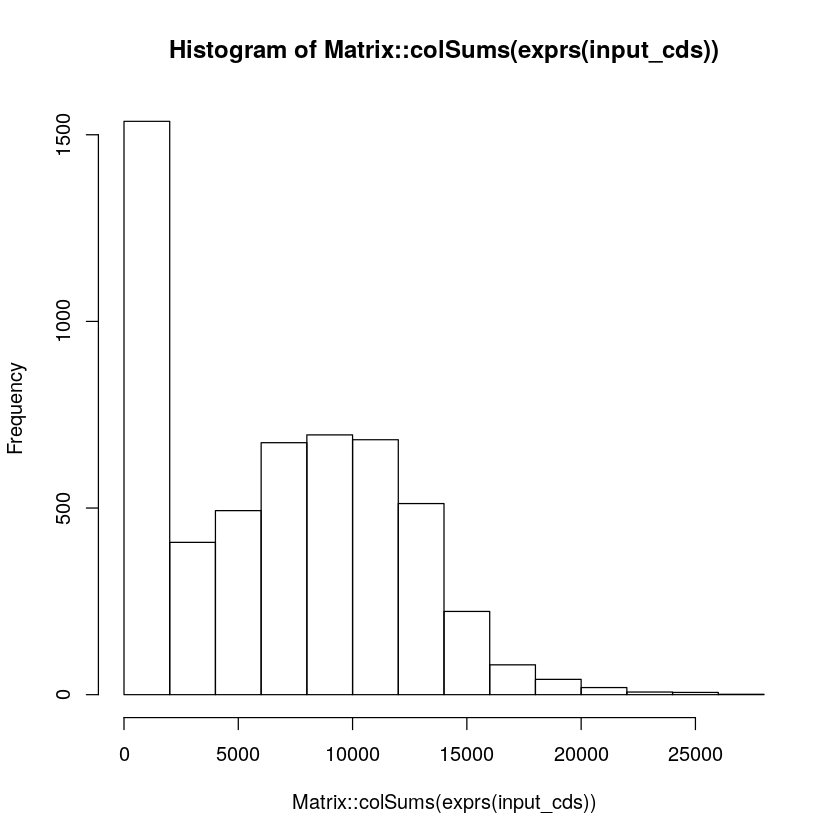

In [6]:
# # Visualize peak_count_per_cell
# hist(Matrix::colSums(exprs(TDR118.cds)))

In [7]:
# # Filter cells by peak_count
# # Please set an appropriate threshold values according to your data 
# max_count <-  15000
# min_count <- 2000
# input_cds <- input_cds[,Matrix::colSums(exprs(input_cds)) >= min_count] 
# input_cds <- input_cds[,Matrix::colSums(exprs(input_cds)) <= max_count] 


# 4. [Skip] Process Cicero-CDS object

In [8]:
# # Data preprocessing
# set.seed(2017)

# input_cds <- detect_genes(input_cds)
# input_cds <- estimate_size_factors(input_cds)
# input_cds <- preprocess_cds(input_cds, method = "LSI")

# # Dimensional reduction with umap
# input_cds <- reduce_dimension(input_cds, reduction_method = 'UMAP', 
#                               preprocess_method = "LSI")
# umap_coords <- reducedDims(input_cds)$UMAP


# cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

# # Save Cds object (Optional)
# #saveRDS(cicero_cds, paste0(output_folder, "/cicero_cds.Rds"))



Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.84960828849071
Median shared cells bin-bin: 0



# 5. [Skip] Load reference genome information

To run Cicero, you need to get a genomic coordinate file that contains the length of each chromosome.
You can download the mm10 genomic information with the following command.

If your scATAC-seq data was generated with a different reference genome, you will need to get the genome coordinates file for the reference genome you used. See the Cicero documentation for more information.

https://cole-trapnell-lab.github.io/cicero-release/docs_m3/#installing-cicero

In [29]:
# !!Please make sure that the reference genome information below matches your scATAC-seq reference genome.

# # If your scATAC-seq was aligned to the mm10 reference genome, you can read the chromosome length file using the following command.
# download.file(url = "https://raw.githubusercontent.com/morris-lab/CellOracle/master/docs/demo_data/mm10_chromosome_length.txt",
#               destfile = "./mm10_chromosome_length.txt")
# chromosome_length <- read.table("./mm10_chromosome_length.txt")

# For mm9 genome, you can use the following command.
data("mouse.mm9.genome")
chromosome_length <- mouse.mm9.genome
chromosome_length

# For hg19 genome, you can use the following command.
# data("human.hg19.genome")
# chromosome_length <- human.hg19.genome
# chromosome_length



V1,V2
<fct>,<int>
chr1,197195432
chr2,181748087
chr3,159599783
chr4,155630120
chr5,152537259
chr6,149517037
chr7,152524553
chr8,131738871
chr9,124076172


# 6. Run Cicero

In [10]:
# Run the main function
conns <- run_cicero(cicero_cds, chromosome_length) # Takes a few minutes to run

# Save results (Optional)
#saveRDS(conns, paste0(output_folder, "/cicero_connections.Rds"))

# Check results
head(conns)

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,chr10_100006139_100006389,chr10_99774288_99774570,-0.003546179
2,chr10_100006139_100006389,chr10_99825945_99826237,-0.027536333
3,chr10_100006139_100006389,chr10_99830012_99830311,0.009588013
4,chr10_100006139_100006389,chr10_99833211_99833540,-0.008067111
5,chr10_100006139_100006389,chr10_99941805_99941955,0.000000000
7,chr10_100006139_100006389,chr10_100015291_100017830,-0.015018099


# 7. Save results for the next step

In [26]:
all_peaks <- row.names(exprs(input_cds))
write.csv(x = all_peaks, file = paste0(output_folder, "/all_peaks.csv"))
write.csv(x = conns, file = paste0(output_folder, "/cicero_connections.csv"))


**Please go to next step: TSS annotation**

https://morris-lab.github.io/CellOracle.documentation/tutorials/base_grn.html#step2-tss-annotation